In [18]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [4]:
df.shape

(400, 4)

In [5]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
df.columns

Index([u'admit', u'gre', u'gpa', u'rank'], dtype='object')

In [8]:
print df.columns

Index([u'admit', u'gre', u'gpa', u'rank'], dtype='object')


In [9]:
# frequency table cutting presitge and whether or not someone was admitted
print pd.crosstab(df['admit'], df['rank'], rownames=['admit'])

rank    1   2   3   4
admit                
0      28  97  93  55
1      33  54  28  12


In [10]:
df.std()

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

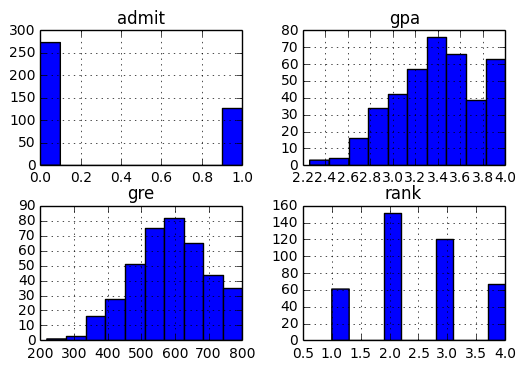

In [11]:
df.hist()
pl.show()

In [12]:
# pandas gives you a great deal of control over how categorical variables are represented. 
# We're going dummify the "prestige" column using get_dummies.

# get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified.
# In this case, prestige has four levels: 1, 2, 3 and 4 (1 being most prestigious). 
# When we call get_dummies, we get a dataframe with four columns, each of which describes one of those levels.
# dummify rank

dummy_ranks = pd.get_dummies(df['rank'], prefix='prestige')
print dummy_ranks.head()

   prestige_1  prestige_2  prestige_3  prestige_4
0         0.0         0.0         1.0         0.0
1         0.0         0.0         1.0         0.0
2         1.0         0.0         0.0         0.0
3         0.0         0.0         0.0         1.0
4         0.0         0.0         0.0         1.0


In [13]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61         0.0         1.0         0.0
1      1  660  3.67         0.0         1.0         0.0
2      1  800  4.00         0.0         0.0         0.0
3      1  640  3.19         0.0         0.0         1.0
4      0  520  2.93         0.0         0.0         1.0


In [14]:
# manually add the intercept
data['intercept'] = 1.0

In [15]:
print data.head() 

   admit  gre   gpa  prestige_2  prestige_3  prestige_4  intercept
0      0  380  3.61         0.0         1.0         0.0        1.0
1      1  660  3.67         0.0         1.0         0.0        1.0
2      1  800  4.00         0.0         0.0         0.0        1.0
3      1  640  3.19         0.0         0.0         1.0        1.0
4      0  520  2.93         0.0         0.0         1.0        1.0


In [16]:
train_cols = data.columns[1:]
print(train_cols)

Index([u'gre', u'gpa', u'prestige_2', u'prestige_3', u'prestige_4',
       u'intercept'],
      dtype='object')


In [19]:
logit = sm.Logit(data['admit'], data[train_cols])

In [22]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [26]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Feb 2017   Pseudo R-squ.:                 0.08292
Time:                        18:07:15   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [27]:
print result.summary2()

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: admit            AIC:              470.5175  
Date:               2017-02-13 18:07 BIC:              494.4663  
No. Observations:   400              Log-Likelihood:   -229.26   
Df Model:           5                LL-Null:          -249.99   
Df Residuals:       394              LLR p-value:      7.5782e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
gre            0.0023    0.0011   2.0699  0.0385   0.0001   0.0044
gpa            0.8040    0.3318   2.4231  0.0154   0.1537   1.4544
prestige_2    -0.6754    0.3165  -2.1342  0.0328  -1.2958  -0.0551
prestige_3    -1.3402    0.345

In [29]:
# look at the confidence interval of each coeffecient
print result.conf_int()

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [30]:
# Take the exponential of each of the coefficients to generate the odds ratios. 
# This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted. 
# For example, we can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2. 
# UCLA gives a more in depth explanation of the odds ratio in the link below:
# http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm.
# ===================
# odds ratios only
print np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64
